# Tensorflow

In [ ]:
# tensorflow : 다차원배열

In [ ]:
# pip install tensorflow => cpu 버전
# pip install tensorflow-gpu => gpu 버전

In [1]:
import tensorflow as tf
import sys

print(sys.version)
print(tf.__version__)

3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
2.13.0


In [2]:
# 상수 선언
hello = tf.constant('Hello World')
print(hello)
print(hello.numpy()) #바이트 배열
#           메모리로 이동
print(hello.numpy().decode('utf-8')) # 바이트 배열을 스트링으로 변환

#       utf-8       3바이트
#                   2바이트

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)  
#c = a+b

print(c)
print(c.numpy())
print([a.numpy(),b.numpy(),c.numpy()])

tf.Tensor(b'Hello World', shape=(), dtype=string)
b'Hello World'
Hello World
tf.Tensor(42, shape=(), dtype=int32)
42
[10, 32, 42]


In [3]:
node1=tf.constant(3.0)
node2=tf.constant(4.0)
node3=tf.add(node1,node2)

print(node3.numpy())

7.0


In [4]:
def output(a,b):
    return tf.multiply(a, b)

print(output(3.0, 5.0).numpy())
print(output(0.0, 6.0).numpy())
print(output([2.0,3.1,7.4], [6.0,2.5,3.1]).numpy())

15.0
0.0
[12.    7.75 22.94]


In [5]:
#텐서플로의 변수 선언
W = tf.Variable([0.3], dtype=tf.float32)
#               weight(가중치)
b = tf.Variable([-0.3], dtype=tf.float32)

print(W.numpy())
print(b.numpy())

def linear_model(x):
    return tf.multiply(W,tf.add(x,b))

x=[1.,2.,3.,4.]

# x의 값에 따라 linear_model 계산
linear_model(x).numpy()

[0.3]
[-0.3]


array([0.21000001, 0.51000005, 0.81000006, 1.11      ], dtype=float32)

In [6]:
import numpy as np

X = np.array([[1,2,3],[4,5,6]])
print(X.shape)
print('X\n',X)

W = np.array([[np.random.randint(10) for col in range(2)] for row in range(3)])
print(W.shape)
print('W\n',W)

b = np.array([[np.random.randint(10) for col in range(1)] for row in range(2)])
print(b.shape)
print('b\n',b)

(2, 3)
X
 [[1 2 3]
 [4 5 6]]
(3, 2)
W
 [[5 0]
 [3 2]
 [6 7]]
(2, 1)
b
 [[8]
 [3]]


In [7]:
def expr(X):
    return tf.matmul(X, W) +b #행렬 곱셈

expr(X).numpy()

array([[37, 33],
       [74, 55]])

# Keras(케라스)

In [8]:
# 손실 함수     loss
# 최적화 함수   optimizer

# 회귀분석 1(혈당)

In [8]:
import numpy as np
np.random.seed(7)
#         랜덤 기준값 고정

#데이터 로딩, 시작36행은 건너뜀
data=np.genfromtxt("c:/workspace3/data/x09.txt",skip_header=36)
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

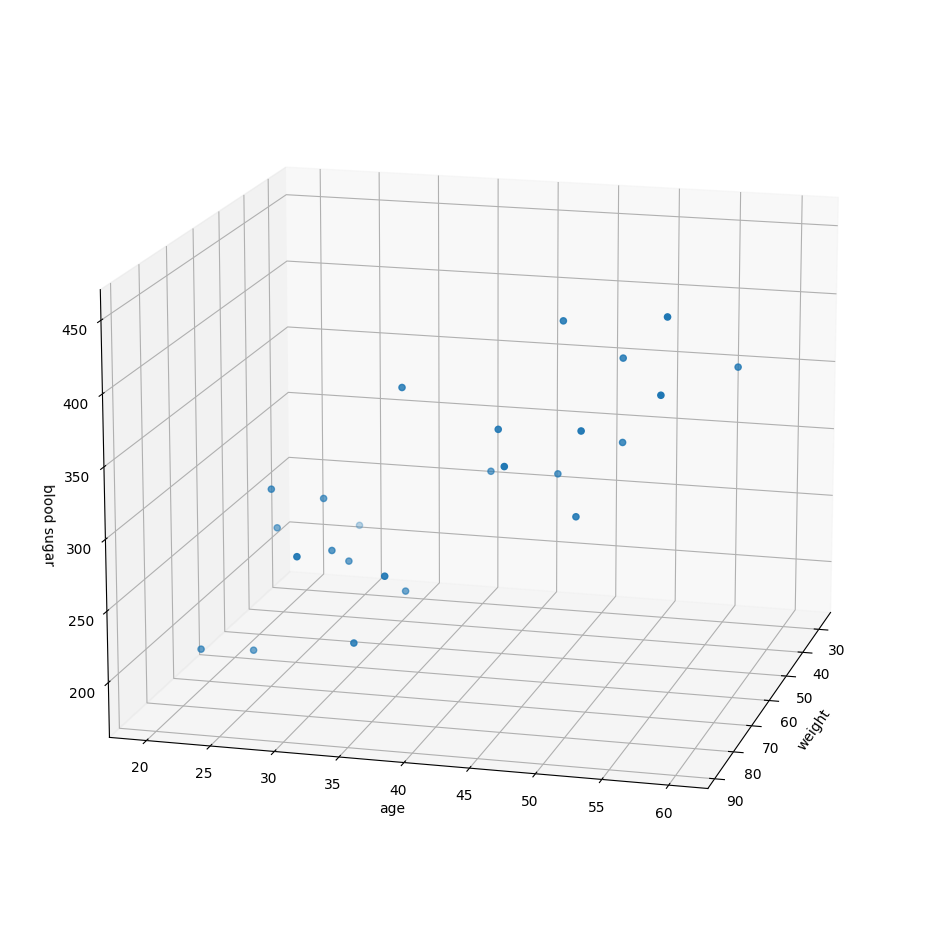

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)

fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)

ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")

ax.view_init(15,15) #출력 각도 설정

plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

#데이터를 케라스에 맞게 변환

#독립변수(나이, 체중)
x_data=np.array(data[:,2:4],dtype=np.float32)

#종속변수(혈당 수치)
y_data=np.array(data[:,4],dtype=np.float32)

In [11]:
# Dense 밀집
# Sparse 희소

In [12]:
#회귀분석 모델 생성

model=Sequential()
#       신경망 모형
model.add(Dense(1,input_shape=(2,)))
#         Dense(output, input_shape=입력데이터차원)     (2,) : 1차원 / (2,3) : 2차원
#                           input           ouput
#                           나이xweight     혈당수치
#                           체중xweight
#                           bias(편향)

#손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)
#최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수

#손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표

#손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정

#평균제곱오차(Meam Squared Error, MSE), 회귀분석에서 많이 사용하는 손실함수

# https://keras.io/ko/optimizers/  옵티마이저 참조

rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01 (숫자가 작을 수록 자세히 함 -> 시간이 오래걸림)

model.compile(loss='mse',optimizer=rmsprop)
#             손실       최적화

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


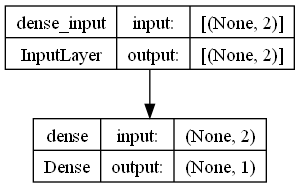

In [13]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [14]:
hist=model.fit(x_data, y_data, epochs=1000)
# 히스토리 = 

Epoch 1/1000
1/1 [==============================] - 0s 243ms/step - loss: 121723.6094
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 119326.3125
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 117610.7422
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 116188.1875
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 114935.5781
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 113795.8281
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 112737.2500
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 111740.0781
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 110791.1172
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 109881.0469
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 109003.0312
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss

In [15]:
hist.history.keys()

dict_keys(['loss'])

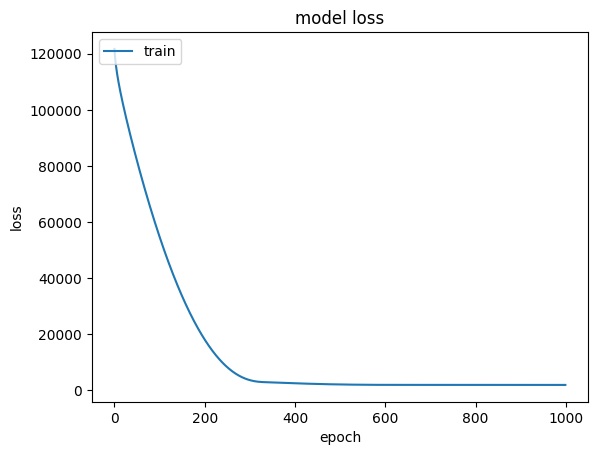

In [16]:
plt.plot(hist.history["loss"])
plt.title("model loss")

plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["train"],loc="upper left")

plt.show()

In [17]:
#새로운 데이터로 예측
#체중 100kg, 40세

#1차원 배열을 1행 2열의 2차원 배열로 변환
# model.predict(np.array([100,40]).reshape(1,2))
model.predict(np.array([[100,40]]))

1/1 [==============================] - 0s 58ms/step


array([[350.51968]], dtype=float32)

In [18]:
#체중 60kg, 25세
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 17ms/step


array([[219.60318]], dtype=float32)

In [19]:
#회귀선을 그리기 위한 작업
#가중치와 절편,편향(bias)
w, b =model.get_weights()

w, b

(array([[1.1940838],
        [5.5435424]], dtype=float32),
 array([9.369606], dtype=float32))

In [20]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

x=np.linspace(20,100,50).reshape(50,1)
#          start stop step
y=np.linspace(10,70,50).reshape(50,1)

x2=np.concatenate((x,y),axis=1) #x,y연결

#행렬곱셈
z=np.matmul(x2,w)+b

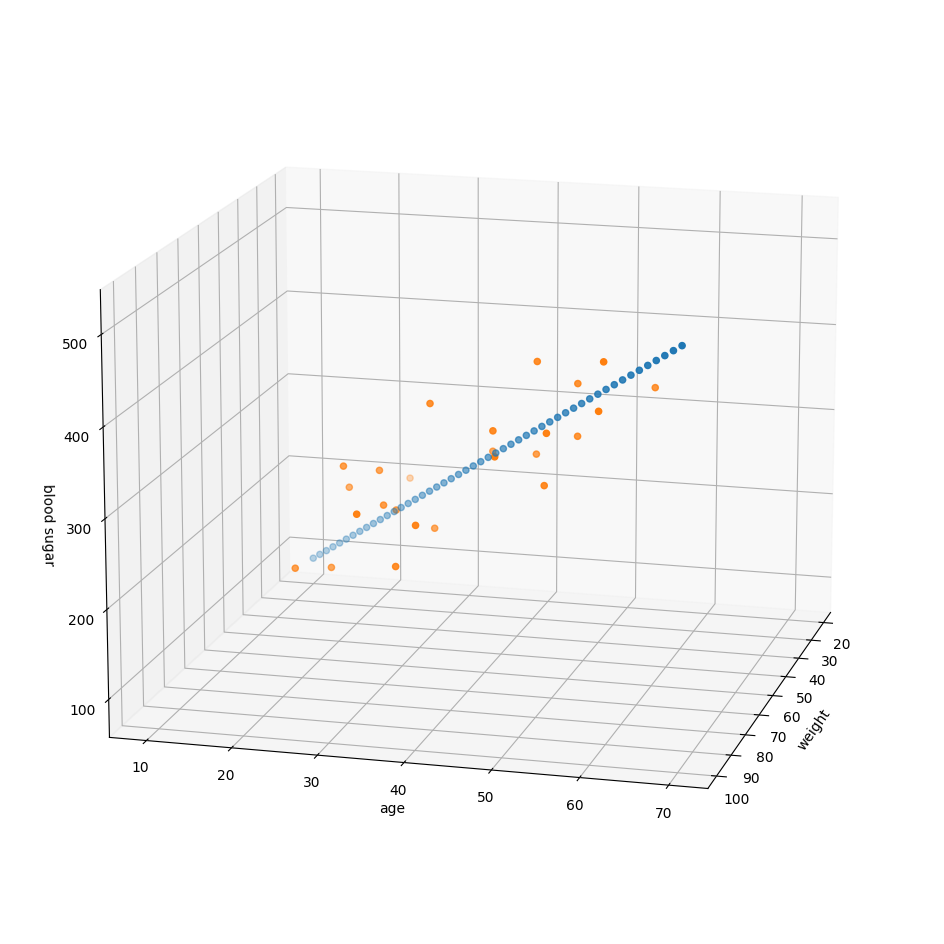

In [21]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')

#회귀선
ax.scatter(x,y,z)

#산점도
ax.scatter(xdata,ydata,zdata)

ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")

ax.view_init(15,15)

plt.show()